In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt


#Imports excel spreadsheet file
df = pd.read_excel(io='../Datasets/Online Retail.xlsx', sheet_name='Online Retail')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
df.shape

(541909, 8)

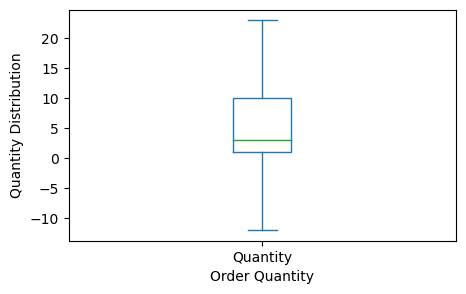

In [3]:
# Cleaning the data

# There are negatives due to refunds

ax = df['Quantity'].plot.box(showfliers=False, figsize=(5,3))
plt.xlabel('Order Quantity') 
plt.ylabel('Quantity Distribution')

plt.suptitle("")
plt.show()

In [4]:
# Filtering out the negatives

df= df.loc[df['Quantity'] > 0]

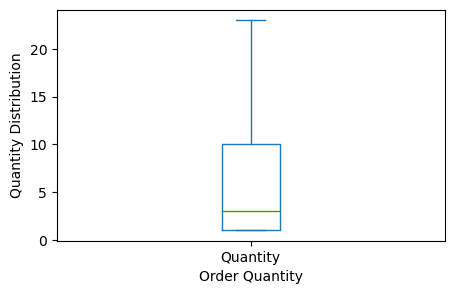

In [5]:
ax = df['Quantity'].plot.box(showfliers=False, figsize=(5,3))
plt.xlabel('Order Quantity') 
plt.ylabel('Quantity Distribution')

plt.suptitle("")
plt.show()

In [6]:
# resample samples and time-series data in to the frequency you desire with number of distinct invoices

monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
monthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

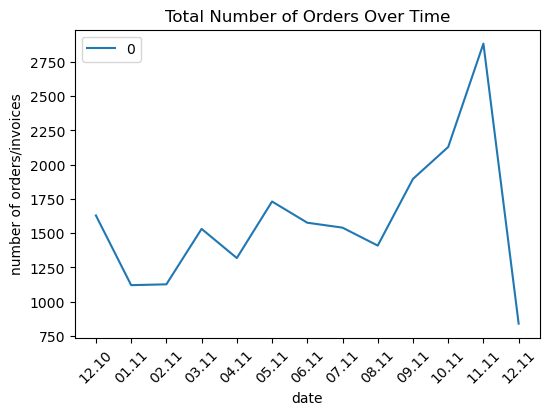

In [7]:
# plots a dataframe graph

ax = pd.DataFrame(monthly_orders_df.values).plot(figsize = (6,4))

plt.xlabel('date') 
plt.ylabel('number of orders/invoices')
plt.title('Total Number of Orders Over Time')

# labels the increments
plt.xticks(range(len(monthly_orders_df.index)),[x.strftime('%m.%y') for x in monthly_orders_df.index], rotation=45)
plt.show()

In [8]:
# checking df for large fall off in numbers

invoice_dates = df.loc[df['InvoiceDate'] >= '2011-12-01', 'InvoiceDate']

# looks at max and min date of variable
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


In [9]:
# removes lower dates

df =df.loc[df['InvoiceDate'] < '2011-12-01']

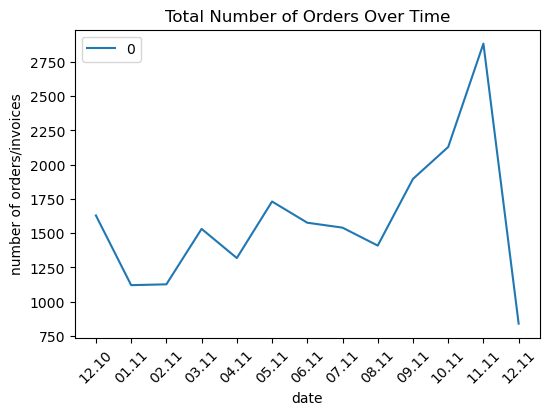

In [10]:
ax = pd.DataFrame(monthly_orders_df.values).plot(figsize = (6,4))

plt.xlabel('date') 
plt.ylabel('number of orders/invoices')
plt.title('Total Number of Orders Over Time')

# labels the increments
plt.xticks(range(len(monthly_orders_df.index)),[x.strftime('%m.%y') for x in monthly_orders_df.index], rotation=45)
plt.show()

In [11]:
# Looking at the monthly revenue

df['Sales'] = df['Quantity'] * df['UnitPrice']

monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()
monthly_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

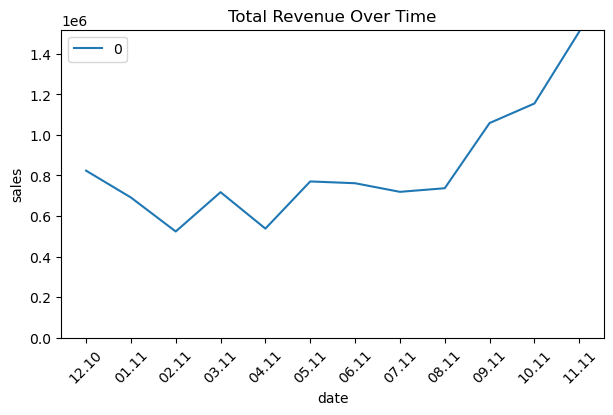

In [12]:
# plots the sales revenue over time

ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize = (7,4))

plt.xlabel('date') 
plt.ylabel('sales')
plt.title('Total Revenue Over Time')

ax.set_ylim(0, max(monthly_revenue_df.values) +10000)

# labels the increments
plt.xticks(range(len(monthly_revenue_df.index)),[x.strftime('%m.%y') for x in monthly_revenue_df.index], rotation=45)
plt.show()

In [13]:
# Aggregate repeat data (customer ID's)

# Groups by invoice number and date then sums sales
invoice_customer_df = df.groupby(by=['InvoiceNo', 'InvoiceDate']).agg({'Sales': sum,
                                                                       'CustomerID': max,
                                                                       'Country': max}).reset_index()
invoice_customer_df

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom
...,...,...,...,...,...
19926,579881,2011-11-30 17:22:00,905.52,12429.0,Denmark
19927,579885,2011-11-30 17:37:00,1075.36,15444.0,United Kingdom
19928,A563185,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
19929,A563186,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [14]:
# Aggregate customer sales per month

monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

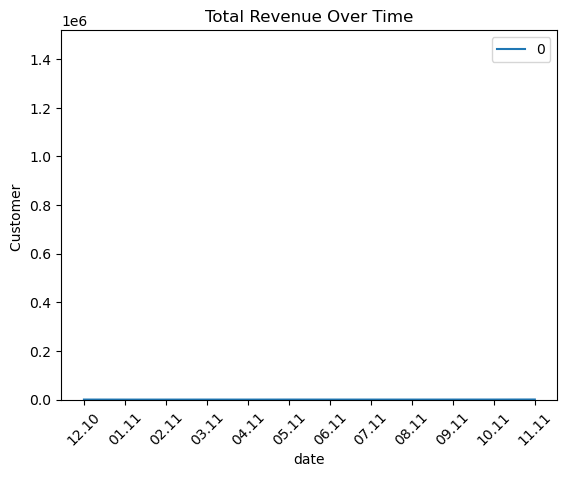

In [15]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot()

plt.xlabel('date') 
plt.ylabel('Customer ')
plt.title('Total Revenue Over Time')

ax.set_ylim(0, max(monthly_revenue_df.values) +10000)

# labels the increments
plt.xticks(range(len(monthly_revenue_df.index)),[x.strftime('%m.%y') for x in monthly_revenue_df.index], rotation=45)
plt.show()


In [16]:
# Compare against total number of customers

monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

In [17]:
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df *100
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

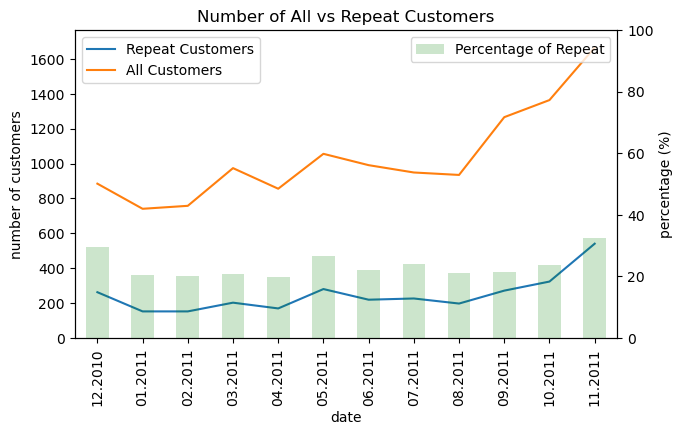

In [18]:
# visualising it all in one chart

ax =pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(7,4))

pd.DataFrame(monthly_unique_customers_df.values).plot(ax=ax)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(ax=ax, secondary_y=True, color='green', alpha=0.2)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs Repeat Customers')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0,100])

plt.xticks(range(len(monthly_repeat_customers_df.index)),
          [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], rotation=45
          )

plt.show()

In [19]:
# monthly revenue from repeat customers

monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'CustomerID']).filter(
    lambda x: len(x) > 1).resample('M').sum()['Sales']

monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0

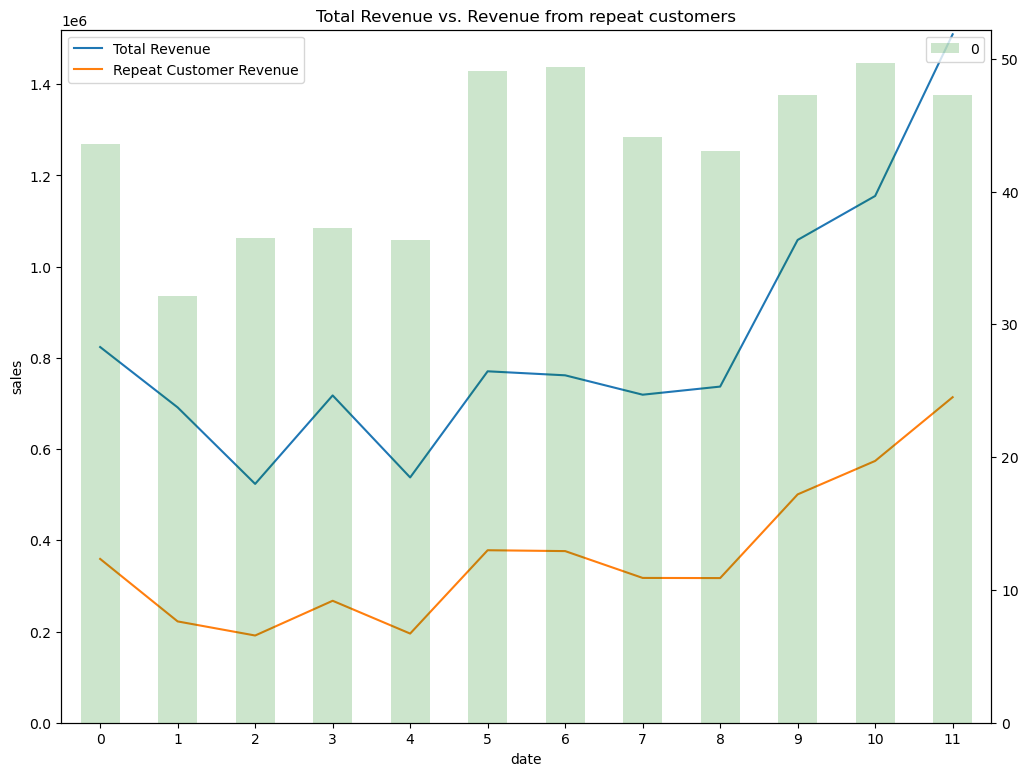

In [20]:
# visualising the above

ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(ax=ax)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from repeat customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])


ax.set_ylim([0, monthly_revenue_df.values.max()+10000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(ax=ax2, kind='bar', color='g', alpha=0.2)


plt.show()

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([x.strftime('%m.Y') for x in monthly_rev_perc_repeat_customers_df.index])

plt.show()

In [35]:
# Looking at how customers engage with individual products over time

# counts the number of items sold for each product 

date_item_df = df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()
date_item_df = date_item_df.reindex()

# renames column 
date_item_df = date_item_df.rename(index={2: 'Quantity'})

#changes series to dataframe
date_item_df =date_item_df.to_frame()
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10125           154
            10133           130
            10135           411
...                         ...
2011-11-30  C2              173
            DCGSSGIRL         1
            DOT              47
            M              3894
            POST           1262

[31701 rows x 1 columns]

In [36]:
# See what sold the most in November

# Rank items by the last month sales - remove 'by' for series
last_month_sorted_df = (date_item_df.loc['2011-11-30']).sort_values(by='Quantity', ascending=False).reset_index()
last_month_sorted_df


,StockCode,Quantity
0,23084,14954
1,84826,12551
2,22197,12460
3,22086,7908
4,85099B,5909
...,...,...
2941,84549,1
2942,84527,1
2943,90082B,1
2944,90082D,1


In [40]:
# 'isin' checks whether each element matches with one of the elements in an array.
# Aggregated by month

date_item_df = df.loc[df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])].set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'StockCode'
])['Quantity'].sum()

date_item_df

InvoiceDate  StockCode
2010-12-31   22086         2460
             22197         2738
             84826          366
             85099B        2152
2011-01-31   22086           24
             22197         1824
             84826          480
             85099B        2747
2011-02-28   22086            5
             22197         2666
             84826           66
             85099B        3080
2011-03-31   22086           87
             22197         2803
             84826           60
             85099B        5282
2011-04-30   22086           13
             22197         1869
             84826            1
             85099B        2456
2011-05-31   22086           17
             22197         6849
             23084         1131
             85099B        3621
2011-06-30   22086          344
             22197         2095
             23084         1713
             84826            4
             85099B        3682
2011-07-31   22086          383
             2219

In [43]:
# transform into a tabular format

# Pivots the data into stockcode rows and quantity columns
trending_times_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)

# Resets the index and removes the columns title
trending_times_df = trending_times_df.reset_index()
trending_times_df = trending_times_df.set_index('InvoiceDate')
trending_times_df.columns = trending_times_df.columns.droplevel(0)

trending_times_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2460.0,2738.0,0.0,366.0,2152.0
2011-01-31,24.0,1824.0,0.0,480.0,2747.0
2011-02-28,5.0,2666.0,0.0,66.0,3080.0
2011-03-31,87.0,2803.0,0.0,60.0,5282.0
2011-04-30,13.0,1869.0,0.0,1.0,2456.0
2011-05-31,17.0,6849.0,1131.0,0.0,3621.0
2011-06-30,344.0,2095.0,1713.0,4.0,3682.0
2011-07-31,383.0,1876.0,318.0,2.0,3129.0
2011-08-31,490.0,5421.0,2267.0,72.0,5502.0


([<matplotlib.axis.XTick at 0x1d00d0d1b50>,
 [Text(0, 0, '12.2010'),
  Text(1, 0, '01.2011'),
  Text(2, 0, '02.2011'),
  Text(3, 0, '03.2011'),
  Text(4, 0, '04.2011'),
  Text(5, 0, '05.2011'),
  Text(6, 0, '06.2011'),
  Text(7, 0, '07.2011'),
  Text(8, 0, '08.2011'),
  Text(9, 0, '09.2011'),
  Text(10, 0, '10.2011'),
  Text(11, 0, '11.2011')])

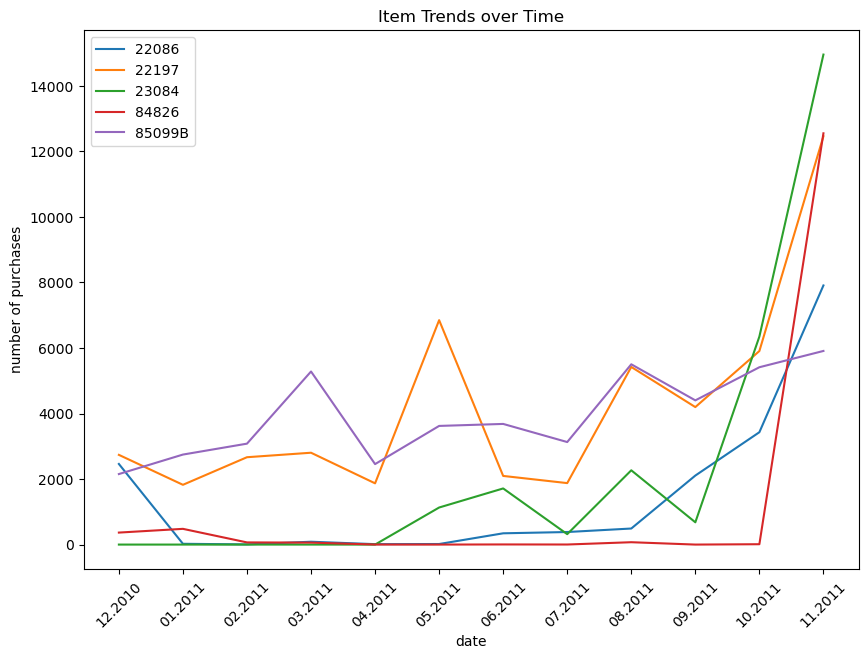

In [46]:
# code to build a time series polot to look at trends over time

ax = pd.DataFrame(trending_times_df.values).plot(figsize=(10,7))

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_times_df.columns, loc='upper left')

plt.xticks(range(len(trending_times_df.index)),
          [x.strftime('%m.%Y') for x in trending_times_df.index], rotation=45)
